In [118]:
import pandas as pd
import numpy as np

# display all columns and rows
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('precision', 2)  # show only two decimal digits
pd.options.display.float_format = '{:20,.004f}'.format  # no scientitic display

import warnings
warnings.filterwarnings("ignore")

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv("before_ml.csv",
                   index_col=0)  # subset 10% of 3 dataset

df = data.sample(frac=0.1, random_state=0)
dropcols = ['APP_ETH_2', 'APP_SEX_1']

df.drop(columns=dropcols, inplace=True)

In [3]:
df.rename(columns=({'APP_SEX_2': "female", "APP_ETH_1": "hispanic", "APP_RACE1_1": "native_american",
                    "APP_RACE1_2": "asian", "APP_RACE1_3": "black", "APP_RACE1_4": "hawaiian", "APP_RACE1_5": "white"}), inplace=True)

In [4]:
df2 = df.copy()

In [5]:
features_set = df2.drop(columns = ['APPROVED']).columns.tolist()

In [6]:
df2.loc[(df2.asian == 1) | (df2.white == 1),'race'] = 0

In [7]:
df2.race.fillna(value=1,inplace=True)

# 1. MEASURE DISCRIMINATION

In [8]:
from themis_ml.metrics import mean_difference, normalized_mean_difference, mean_confidence_interval

print("protected class = female, md = : %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df2.APPROVED, df2['female']))
print("protected class = female, nmd = : %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['female']))

print("protected class = hispanic, md = : %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df2.APPROVED, df2['hispanic']))
print("protected class = hispanic: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['hispanic']))

print("protected class = white: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(df2.APPROVED, df2['white']))
print("protected class = white: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['white']))

print("protected class = asian: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(df2.APPROVED, df2['asian']))
print("protected class = asian: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['asian']))

print("protected class = black: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(df2.APPROVED, df2['black']))
print("protected class = black: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['black']))

print("protected class = Native American: %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df2.APPROVED, df2['native_american']))
print("protected class = Native American: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['native_american']))

print("protected class = Hawaiian: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(df2.APPROVED, df2['hawaiian']))
print("protected class = Hawaiian: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df2.APPROVED, df2['hawaiian']))

protected class = female, md = : 0.039, 95% CI [0.033-0.046]
protected class = female, nmd = : 0.056, 95% CI [0.049-0.062]
protected class = hispanic, md = : 0.050, 95% CI [0.040-0.059]
protected class = hispanic: 0.056, 95% CI [0.047-0.066]
protected class = white: -0.100, 95% CI [-0.108--0.092]
protected class = white: -0.408, 95% CI [-0.416--0.400]
protected class = asian: -0.023, 95% CI [-0.035--0.010]
protected class = asian: -0.027, 95% CI [-0.040--0.015]
protected class = black: 0.171, 95% CI [0.160-0.181]
protected class = black: 0.199, 95% CI [0.188-0.210]
protected class = Native American: 0.147, 95% CI [0.116-0.179]
protected class = Native American: 0.185, 95% CI [0.153-0.217]
protected class = Hawaiian: 0.076, 95% CI [0.033-0.119]
protected class = Hawaiian: 0.096, 95% CI [0.053-0.139]


from themis_ml.metrics import mean_difference, normalized_mean_difference, mean_confidence_interval

print("protected class = female, md = : %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df3.APPROVED, df3['female']))
print("protected class = female, nmd = : %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df3.APPROVED, df3['female']))

print("protected class = hispanic, md = : %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df3.APPROVED, df3['hispanic']))
print("protected class = hispanic: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df3.APPROVED, df3['hispanic']))
print("protected class = minority, md = : %0.03f, 95%% CI [%0.03f-%0.03f]" % mean_difference(
    df3.APPROVED, df3['minority']))
print("protected class = minority: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      normalized_mean_difference(df3.APPROVED, df3['minority']))

## CREATE BASELINE MODELS
- Choose 3 baseline models: LogisticRegression, DecisionTree, RandomForest
'''

# SPECIFY FEATURE SETS

In [9]:
# FUNCTION TO GET 3 METRICS (MD, NMD, AUC) FOR 3 ESTIMATORS (Logistic, Tree, RF)

import itertools
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score)

N_SPLITS = 10
N_REPEATS = 5
RANDOM_STATE = 1000


def get_estimator_name(e):
    return "".join([x for x in str(type(e)).split(".")[-1] if x.isalpha()])


def get_grid_params(grid_params_dict):
    """Get outer product of grid search parameters."""
    return [
        dict(params) for params in itertools.product(
            *[[(k, v_i) for v_i in v] for
              k, v in grid_params_dict.items()])]


def fit_with_s(estimator):
    has_relabeller = getattr(estimator, "relabeller", None) is not None
    child_estimator = getattr(estimator, "estimator", None)
    estimator_fit_with_s = getattr(estimator, "S_ON_FIT", False)
    child_estimator_fit_with_s = getattr(child_estimator, "S_ON_FIT", False)
    return has_relabeller or estimator_fit_with_s or\
        child_estimator_fit_with_s


def predict_with_s(estimator):
    estimator_pred_with_s = getattr(estimator, "S_ON_PREDICT", False)
    child_estimator = getattr(estimator, "estimator", None)
    return estimator_pred_with_s or \
        getattr(child_estimator, "S_ON_PREDICT", False)


def cross_validation_experiment(estimators, X, y, s, s_name, verbose=True):
    msg = "Training models: protected_class = %s" % s_name
    if verbose:
        print(msg)
        print("-" * len(msg))
    performance_scores = []
    # stratified groups tries to balance out y and s
    groups = [i + j for i, j in zip(y.astype(str), s.astype(str))]
    cv = RepeatedStratifiedKFold(
        n_splits=N_SPLITS,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE)
    for e_name, e in estimators:
        if verbose:
            print("%s, fold:" % e_name),
        for i, (train, test) in enumerate(cv.split(X, y, groups=groups)):
            if verbose:
                print(i),
            # create train and validation fold partitions
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            s_train, s_test = s[train], s[test]

            # fit model and generate train and test predictions
            if fit_with_s(e):
                e.fit(X_train, y_train, s_train)
            else:
                e.fit(X_train, y_train)

            train_pred_args = (X_train, s_train) if predict_with_s(e) \
                else (X_train, )
            test_pred_args = (X_test, s_test) if predict_with_s(e) \
                else (X_test, )

            train_pred_prob = e.predict_proba(*train_pred_args)[:, 1]
            train_pred = e.predict(*train_pred_args)
            test_pred_prob = e.predict_proba(*test_pred_args)[:, 1]
            test_pred = e.predict(*test_pred_args)

            # train scores
            performance_scores.append([
                s_name, e_name, i, "train",
                # regular metrics
                roc_auc_score(y_train, train_pred_prob),

                # fairness metrics
                mean_difference(train_pred, s_train)[0],
                normalized_mean_difference(train_pred, s_train)[0]
            ])
            # test scores
            performance_scores.append([
                s_name, e_name, i, "test",
                # regular metrics
                roc_auc_score(y_test, test_pred_prob),
                # fairness metrics
                mean_difference(train_pred, s_train)[0],
                normalized_mean_difference(test_pred, s_test)[0]
            ])
        if verbose:
            print("")
    if verbose:
        print("")
    return pd.DataFrame(
        performance_scores,
        columns=[
            "protected_class", "estimator", "cv_fold", "fold_type",
            "auc", "mean_diff", "norm_mean_diff"])

In [10]:
# training and target data
X = df2[features_set].values
y = df2["APPROVED"].values
s_female = df2["female"].values
s_hispanic = df2["hispanic"].values
s_race = df2["race"].values

In [11]:
# INITIATE EMPTY MODELS
LOGISTIC_REGRESSION = LogisticRegression(
    penalty="l2", C=0.001, class_weight="balanced")
DECISION_TREE_CLF = DecisionTreeClassifier(
    criterion="entropy", max_depth=10, min_samples_leaf=10, max_features=10,
    class_weight="balanced")
RANDOM_FOREST_CLF = RandomForestClassifier(
    criterion="entropy", n_estimators=50, max_depth=10, max_features=10,
    min_samples_leaf=10, class_weight="balanced")

estimators = [
    ("LogisticRegression", LOGISTIC_REGRESSION),
    ("DecisionTree", DECISION_TREE_CLF),
    ("RandomForest", RANDOM_FOREST_CLF)
]

In [12]:
# USE CROSS VALIDATION WTIH 3 BASELINE MODELS
experiment_baseline_female = cross_validation_experiment(
    estimators, X, y, s_female, "female", verbose=False)
experiment_baseline_hispanic = cross_validation_experiment(
    estimators, X, y, s_hispanic, "hispanic", verbose=False)
experiment_baseline_black = cross_validation_experiment(
    estimators, X, y, s_race, "race", verbose=False)

# SUMMARY TABLE FOR THE MEAND DIFFERENCE AND AUC FOR PROTECTED GROUPS CROSS BASELINE MODELS

In [119]:
FAIRNESS_METRICS = ["mean_diff"]
UTILITY_METRICS = ["auc"]


def summarize_experiment_results(experiment_df):
    return (
        experiment_df
        .drop("cv_fold", axis=1)
        .groupby(["protected_class", "estimator", "fold_type"])
        .mean())


experiment_baseline = pd.concat([experiment_baseline_female, experiment_baseline_hispanic,
                                 experiment_baseline_black])

experiment_baseline_summary = summarize_experiment_results(experiment_baseline)
experiment_baseline_summary.query("fold_type == 'test'")

auc            mean_diff       norm_mean_diff
protected_class estimator          fold_type                                                               
female          DecisionTree       test                    0.8650               0.0514               0.0682
                LogisticRegression test                    0.9139               0.0567               0.0685
                RandomForest       test                    0.9218               0.0427               0.0514
hispanic        DecisionTree       test                    0.8696               0.0222               0.0268
                LogisticRegression test                    0.9139               0.0263               0.0410
                RandomForest       test                    0.9218               0.0125               0.0196
race            DecisionTree       test                    0.8661               0.1278               0.2109
                LogisticRegression test                    0.9139               0.1522               0.2380
                RandomForest       test                    0.9218               0.1301               0.2045

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


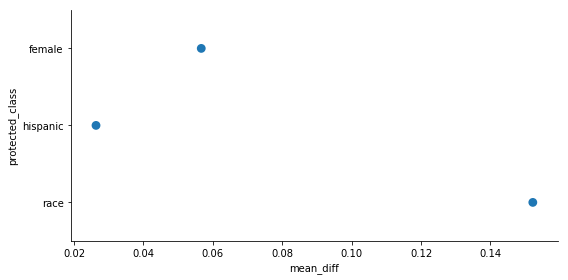

In [14]:
# PLOT THE MEAN DIFFERENCE OF PROTECTED GROUPS CREATED BY LOGISTIC_REGRESSION
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

baseline_df = (
    experiment_baseline
    .query("fold_type == 'test' and estimator == 'LogisticRegression'")
)
sns.factorplot(y="protected_class", x="mean_diff", orient="h", data=baseline_df,
               size=4, aspect=2, join=False)


In [15]:
protected_classes = ["female", "hispanic",
                     'race']
for s in protected_classes:
    mean_ci = mean_confidence_interval(experiment_baseline.query(
        "protected_class == @s").mean_diff.dropna())
    print("grand_mean(mean_diff) for %s - mean: %0.03f, 95%% CI(%0.03f, %0.03f)" %
          (s, mean_ci[0], mean_ci[1], mean_ci[2]))

grand_mean(mean_diff) for female - mean: 0.050, 95% CI(0.049, 0.052)
grand_mean(mean_diff) for hispanic - mean: 0.020, 95% CI(0.018, 0.023)
grand_mean(mean_diff) for race - mean: 0.137, 95% CI(0.134, 0.140)


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


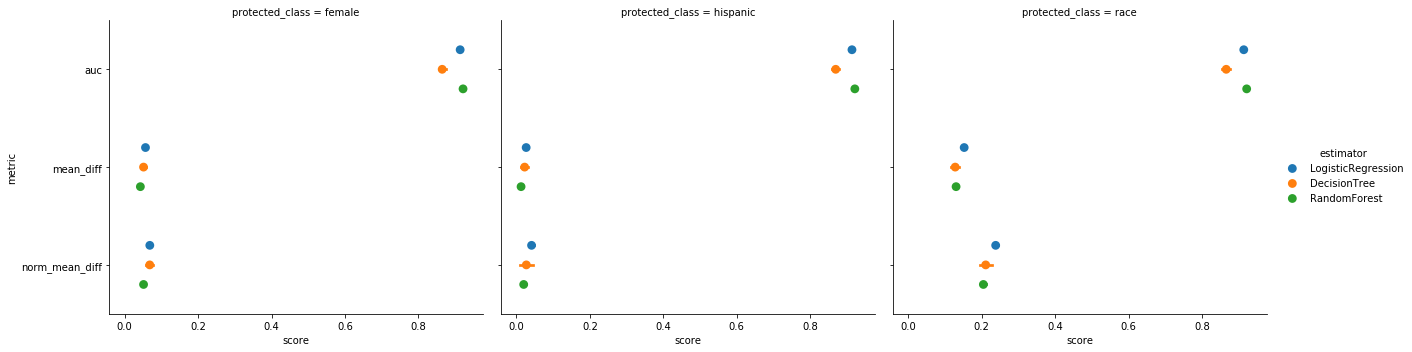

In [16]:
# PLOT DISCRIMINATION MEASUREMENTS WITH BASELINE MODELS
def plot_experiment_results(experiment_results):
    return (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["fold_type", "cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["protected_class", "estimator"],
              var_name="metric", value_name="score")
        .pipe((sns.factorplot, "data"), y="metric",
              x="score", hue="estimator", col="protected_class", col_wrap=3,
              size=5, aspect=1.2, join=False, dodge=0.4)).savefig("output.png")


plot_experiment_results(experiment_baseline)

In [17]:
# DISCRIMINATION MEASUREMENT SUMMARY
from IPython.display import Markdown, display


def print_best_metrics(experiment_results, protected_classes):
    for pclass in protected_classes:
        msg = "#### protected class = %s:" % pclass
        display(Markdown(msg))
        exp_df = experiment_results[
            (experiment_results["protected_class"] == pclass) &
            (experiment_results["fold_type"] == "test")]
        msg = ""

        for m in UTILITY_METRICS:
            utility_msg = \
                "- best utility measured by %s (higher is better)" % m
            best_model = (
                exp_df
                .sort_values(m, ascending=False)
                .drop(["fold_type"], axis=1)
                .iloc[0][[m, "estimator"]])
            msg += utility_msg + " = %0.03f: %s\n" % \
                (best_model[0], best_model[1])

        for m in FAIRNESS_METRICS:
            fairness_msg = \
                "- best fairness measured by %s (lower is better)" % m
            best_model = (
                exp_df
                # score closer to zero is better
                .assign(abs_measure=lambda df: df[m].abs())
                .sort_values("abs_measure")
                .drop(["abs_measure", "fold_type"], axis=1)
                .iloc[0][[m, "estimator"]])
            msg += fairness_msg + " = %0.03f: %s\n" % \
                (best_model[0], best_model[1])
        display(Markdown(msg))


print_best_metrics(experiment_baseline_summary.reset_index(), [
                   "female", "hispanic", "race"])
# CONCLUSION: Overall, Random Forest is the best baseline model used to measure discrimination

#### protected class = female:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.043: RandomForest


#### protected class = hispanic:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.012: RandomForest


#### protected class = race:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.128: DecisionTree


# MITIGATE DISCRIMINATION
# METHOD 1: REMOVE PROTECTED ATTRIBUTES (RPA)
-  Train a model on input variables without protected attributes. This is the naive fairness-aware approach.

In [18]:
# Create feature sets that remove all variables of protected groups
feature_set_no_gender = [f for f in features_set if f != "female"]
feature_set_no_ethnics = [f for f in features_set if f != "hispanic"]
feature_set_no_races = [f for f in features_set if f not in ["native_american", "asian", "black", "hawaiian", "white"]]

# Create new train datasets with no informatin about protected groups
X_no_gender = df2[feature_set_no_gender].values
X_no_ethnics = df2[feature_set_no_ethnics].values
X_no_races = df2[feature_set_no_races].values

In [19]:
# Run Cross Validation Estimators
experiment_naive_female = cross_validation_experiment(
    estimators, X_no_gender, y, s_female, "female", verbose=False)
experiment_naive_hispanic = cross_validation_experiment(
    estimators, X_no_ethnics, y, s_hispanic, "hispanic", verbose=False)
experiment_naive_black = cross_validation_experiment(
    estimators, X_no_races, y, s_race, "race", verbose=False)

In [20]:
# SUMMARY TABLE FOR RPA
experiment_naive = pd.concat([
    experiment_naive_female,
    experiment_naive_hispanic,
    experiment_naive_black
])
experiment_naive_summary = summarize_experiment_results(experiment_naive)
experiment_naive_summary.query("fold_type == 'test'")

auc            mean_diff       norm_mean_diff
protected_class estimator          fold_type                                                               
female          DecisionTree       test                      0.85                 0.05                 0.07
                LogisticRegression test                      0.91                 0.06                 0.07
                RandomForest       test                      0.92                 0.04                 0.05
hispanic        DecisionTree       test                      0.87                 0.02                 0.04
                LogisticRegression test                      0.91                 0.02                 0.04
                RandomForest       test                      0.92                 0.01                 0.02
race            DecisionTree       test                      0.86                 0.13                 0.22
                LogisticRegression test                      0.91                 0.15                 0.23
                RandomForest       test                      0.92                 0.13                 0.20

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### protected class = female:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.043: RandomForest


#### protected class = hispanic:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.011: RandomForest


#### protected class = race:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.128: RandomForest


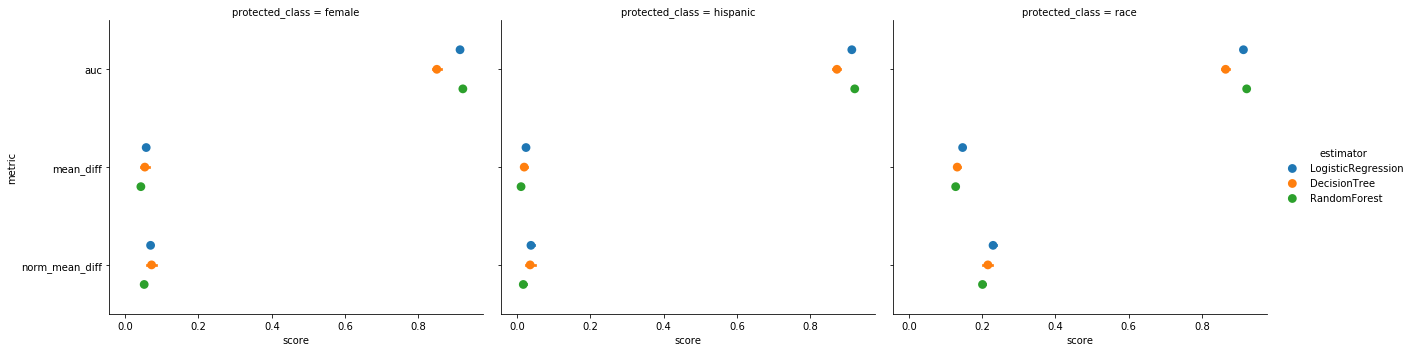

In [21]:
# SUMMARY PLOT FOR RPA
plot_experiment_results(experiment_naive)


# experiment_naive_summary.reset_index()

# BEST METRICS FOR RPA
print_best_metrics(
    experiment_naive_summary.reset_index(),
    ["female", "hispanic", 'race'])


# METHOD 2: RELABEL TARGET VARIABLE (RTV)
Train a model using the Relabelling fairness-aware method. Transformer

In [22]:
from sklearn.base import clone

from themis_ml.preprocessing.relabelling import Relabeller
from themis_ml.meta_estimators import FairnessAwareMetaEstimator

# Create new y label for each of the protected group
relabeller = Relabeller()
# Use the FairnessAwareMetaEstimator as a convenience class to compose together different fairness-aware methods.
# This wraps around the estimators that we defined in the previous
relabelling_estimators = [
    (name, FairnessAwareMetaEstimator(e, relabeller=relabeller))
    for name, e in estimators]

In [23]:
# Run Cross Validation for relabelling_estimators. Noted that we also remove all information about protected \
# groups in training set
experiment_relabel_female = cross_validation_experiment(
    relabelling_estimators, X_no_gender, y, s_female, "female", verbose=False)
experiment_relabel_hispanic = cross_validation_experiment(
    relabelling_estimators, X_no_ethnics, y, s_hispanic, "hispanic", verbose=False)
experiment_relabel_black = cross_validation_experiment(
    relabelling_estimators, X_no_races, y, s_race, "race", verbose=False)

In [24]:
# SUMMARY TABLE FOR RTV
experiment_relabel = pd.concat([
    experiment_relabel_female,
    experiment_relabel_hispanic,
    experiment_relabel_black,
])
experiment_relabel_summary = summarize_experiment_results(experiment_relabel)
experiment_relabel_summary.query("fold_type == 'test'")


auc            mean_diff       norm_mean_diff
protected_class estimator          fold_type                                                               
female          DecisionTree       test                      0.86                 0.05                 0.06
                LogisticRegression test                      0.92                 0.05                 0.06
                RandomForest       test                      0.92                 0.04                 0.05
hispanic        DecisionTree       test                      0.87                 0.02                 0.03
                LogisticRegression test                      0.91                 0.02                 0.04
                RandomForest       test                      0.92                 0.01                 0.02
race            DecisionTree       test                      0.86                 0.12                 0.20
                LogisticRegression test                      0.92                 0.15                 0.24
                RandomForest       test                      0.92                 0.13                 0.20

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### protected class = female:

- best utility measured by auc (higher is better) = 0.923: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.042: RandomForest


#### protected class = hispanic:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.010: RandomForest


#### protected class = race:

- best utility measured by auc (higher is better) = 0.923: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.123: DecisionTree


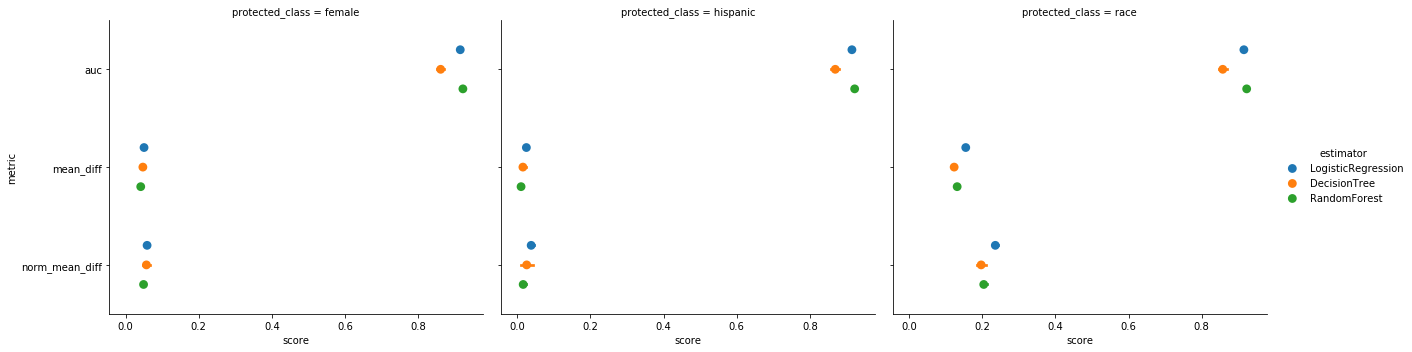

In [25]:
# SUMMARY PLOT FOR RTV
plot_experiment_results(experiment_relabel)


# BEST METRICS FOR RTV
print_best_metrics(
    experiment_relabel_summary.reset_index(),
    ["female", "hispanic", 'race'])

In [26]:
# VALIDATION CURVE???


# METHOD 3: ADDICTIVE COUNTERFACTUALLY FAIR (ACF)
Estimator

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from themis_ml.linear_model.counterfactually_fair_models import LinearACFClassifier

LINEAR_REG = LinearRegression()
DECISION_TREE_REG = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
RANDOM_FOREST_REG = RandomForestRegressor(
    n_estimators=50, max_depth=10, min_samples_leaf=10)


# use the estimators defined above to define the linear additive
# counterfactually fair models
linear_acf_estimators = [
    (name, LinearACFClassifier(
        target_estimator=e,
        binary_residual_type="absolute"))
    for name, e in estimators]

In [28]:
# Run Cross Validation with ACF
experiment_acf_female = cross_validation_experiment(
    linear_acf_estimators, X_no_gender, y, s_female, "female", verbose=False)
experiment_acf_hispanic = cross_validation_experiment(
    linear_acf_estimators, X_no_ethnics, y, s_hispanic, "hispanic", verbose=False)
experiment_acf_race = cross_validation_experiment(
    linear_acf_estimators, X_no_races, y, s_race, "race", verbose=False)

In [120]:
# SUMMARY TABLE FOR ACF
experiment_acf = pd.concat([
    experiment_acf_female,
    experiment_acf_hispanic,
    experiment_acf_race
])
experiment_acf_summary = summarize_experiment_results(experiment_acf)
experiment_acf_summary.query("fold_type == 'test'")

auc            mean_diff       norm_mean_diff
protected_class estimator          fold_type                                                               
female          DecisionTree       test                    0.8722               0.0540               0.0696
                LogisticRegression test                    0.9134               0.0250               0.0307
                RandomForest       test                    0.9214               0.0518               0.0633
hispanic        DecisionTree       test                    0.8675               0.0554               0.0893
                LogisticRegression test                    0.9135               0.0042               0.0068
                RandomForest       test                    0.9217               0.0182               0.0284
race            DecisionTree       test                    0.8623               0.1746               0.2893
                LogisticRegression test                    0.9053               0.0828               0.1331
                RandomForest       test                    0.9215               0.1291               0.2047

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### protected class = female:

- best utility measured by auc (higher is better) = 0.921: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.025: LogisticRegression


#### protected class = hispanic:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.004: LogisticRegression


#### protected class = race:

- best utility measured by auc (higher is better) = 0.922: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.083: LogisticRegression


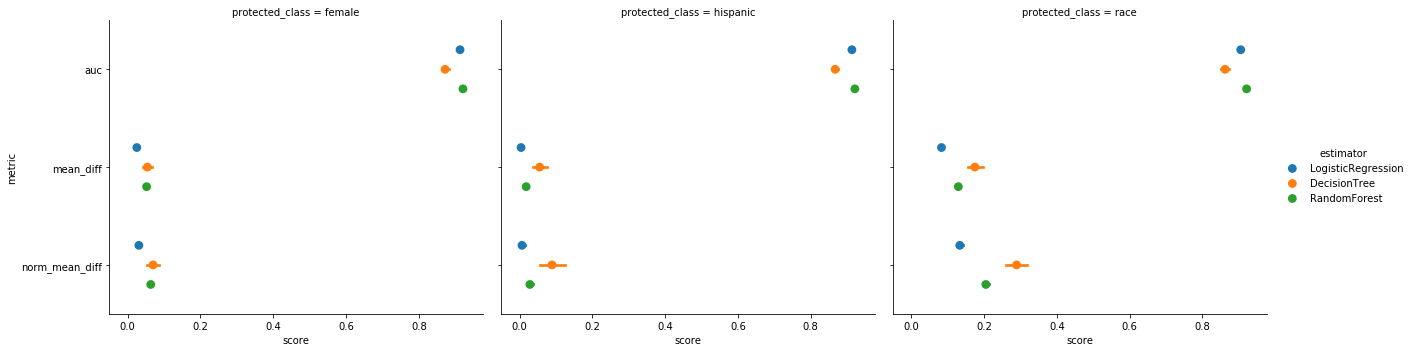

In [30]:
# SUMMARY PLOT FOR ACF
plot_experiment_results(experiment_acf)

# BEST METRICS FOR ACF
print_best_metrics(
    experiment_acf_summary.reset_index(),
    ["female", "hispanic", "race"])

# METHOD 4: REJECT-OPTION CLASSIFICATION (ROC)
Predictor

In [31]:
from themis_ml.postprocessing.reject_option_classification import SingleROClassifier

# use the estimators defined above to define the linear additive
# counterfactually fair models
single_roc_clf_estimators = [
    (name, SingleROClassifier(estimator=e))
    for name, e in estimators]

In [32]:
# Run Cross Validation with ROC Estimator. Train set doesn't have columns of protected groups
experiment_single_roc_female = cross_validation_experiment(
    single_roc_clf_estimators, X_no_gender, y, s_female, "female", verbose=False)
experiment_single_roc_hispanic = cross_validation_experiment(
    single_roc_clf_estimators, X_no_ethnics, y, s_hispanic, "hispanic", verbose=False)
experiment_single_roc_race = cross_validation_experiment(
    single_roc_clf_estimators, X_no_races, y, s_race, "race", verbose=False)

In [92]:
# SUMMARY TABLE FOR ROC
experiment_single_roc = pd.concat([
    experiment_single_roc_female,
    experiment_single_roc_hispanic,
    experiment_single_roc_race
])
experiment_single_roc_summary = summarize_experiment_results(experiment_single_roc)
experiment_single_roc_summary.query("fold_type == 'test'")

auc            mean_diff       norm_mean_diff
protected_class estimator          fold_type                                                               
female          DecisionTree       test                      0.87                 0.06                 0.08
                LogisticRegression test                      0.91                 0.06                 0.07
                RandomForest       test                      0.92                 0.06                 0.06
hispanic        DecisionTree       test                      0.86                 0.03                 0.04
                LogisticRegression test                      0.91                 0.04                 0.05
                RandomForest       test                      0.92                 0.04                 0.06
race            DecisionTree       test                      0.87                 0.14                 0.21
                LogisticRegression test                      0.91                 0.17                 0.24
                RandomForest       test                      0.92                 0.16                 0.23

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


#### protected class = female:

- best utility measured by auc (higher is better) = 0.920: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.055: RandomForest


#### protected class = hispanic:

- best utility measured by auc (higher is better) = 0.919: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.026: DecisionTree


#### protected class = race:

- best utility measured by auc (higher is better) = 0.920: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.139: DecisionTree


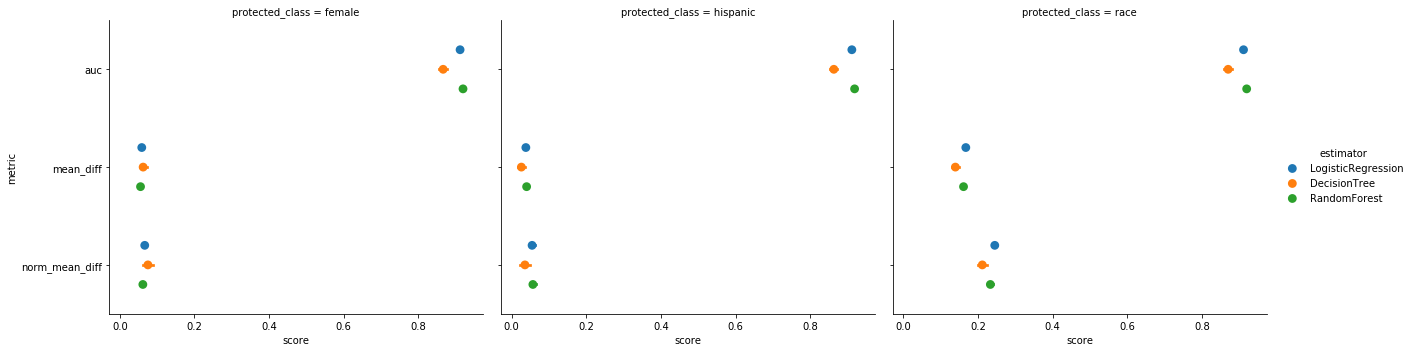

In [93]:
# SUMMARY PLOT FOR ROC
plot_experiment_results(experiment_single_roc)


# BEST METRICS FOR ROC
print_best_metrics(
    experiment_single_roc_summary.reset_index(),
    ["female", "hispanic", "race"])

# COMPARE DIFFERENT FAIR-AWARENESS METHODS WITH BASELINE MODELS

In [94]:
compare_experiments = (
    pd.concat([
        experiment_baseline.assign(experiment="B"),
        experiment_naive.assign(experiment="RPA"),
        experiment_relabel.assign(experiment="RTV"),
        experiment_acf.assign(experiment="ACF"),
        experiment_single_roc.assign(experiment="ROC")
    ])
    .assign(
        protected_class=lambda df: df.protected_class.str.replace("_", " "),
    )
)

In [95]:
compare_experiments

,protected_class,estimator,cv_fold,fold_type,auc,mean_diff,norm_mean_diff,experiment
0,female,LogisticRegression,0,train,0.91,0.06,0.07,B
1,female,LogisticRegression,0,test,0.92,0.06,0.05,B
2,female,LogisticRegression,1,train,0.91,0.06,0.07,B
3,female,LogisticRegression,1,test,0.92,0.06,0.07,B
4,female,LogisticRegression,2,train,0.91,0.06,0.07,B
5,female,LogisticRegression,2,test,0.91,0.06,0.08,B
6,female,LogisticRegression,3,train,0.91,0.06,0.07,B
7,female,LogisticRegression,3,test,0.91,0.06,0.06,B
8,female,LogisticRegression,4,train,0.92,0.06,0.07,B
9,female,LogisticRegression,4,test,0.91,0.06,0.06,B


In [110]:
result.groupby(["protected_class", "estimator", "fold_type", "experiment"]).mean_diff.mean()

protected_class  estimator           fold_type  experiment
female           DecisionTree        test       ACF                         0.054
                                                B                           0.051
                                                ROC                         0.062
                                                RPA                         0.054
                                                RTV                         0.047
                 LogisticRegression  test       ACF                         0.025
                                                B                           0.057
                                                ROC                         0.059
                                                RPA                         0.057
                                                RTV                         0.051
                 RandomForest        test       ACF                         0.052
                                       

In [96]:
result = compare_experiments[compare_experiments.fold_type == "test"]

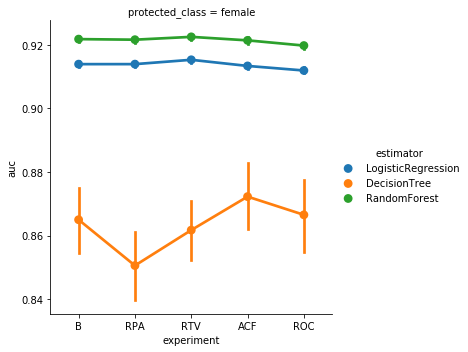

In [105]:
sns.catplot(data=result[result.protected_class=='female'], y='auc', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class')

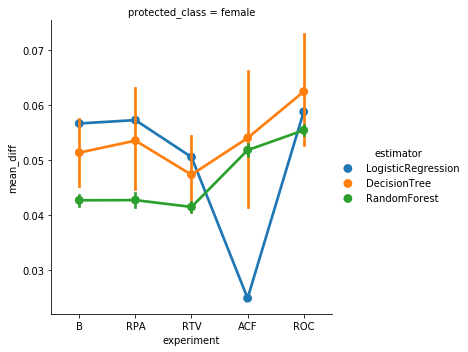

In [97]:
sns.catplot(data=result[result.protected_class=='female'], y='mean_diff', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class').savefig("female.png", dpi=500)

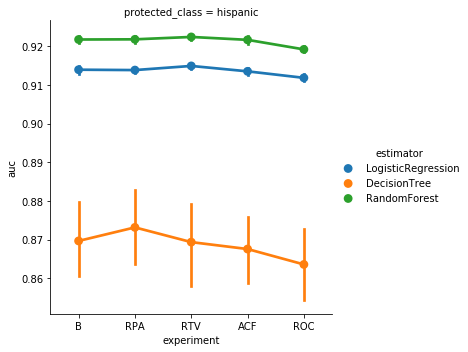

In [106]:
sns.catplot(data=result[result.protected_class=='hispanic'], y='auc', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class')

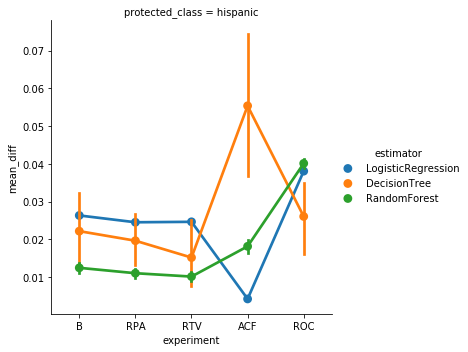

In [98]:
sns.catplot(data=result[result.protected_class=='hispanic'], y='mean_diff', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class').savefig("hispanic.png", dpi=500)

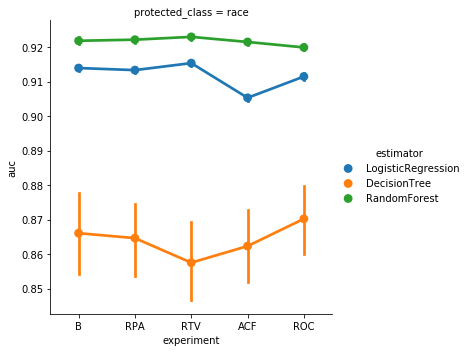

In [107]:
sns.catplot(data=result[result.protected_class=='race'], y='auc', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class')

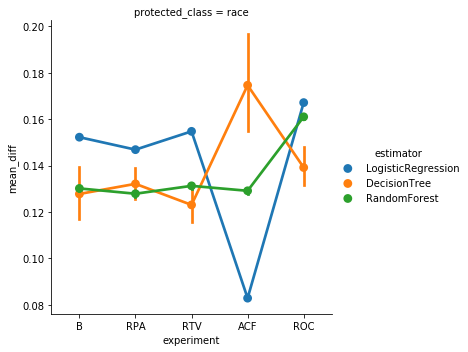

In [99]:
sns.catplot(data=result[result.protected_class=='race'], y='mean_diff', x='experiment', kind ='point', \
            height=5, aspect=1, \
            hue='estimator', col = 'protected_class').savefig("race.png", dpi=500)

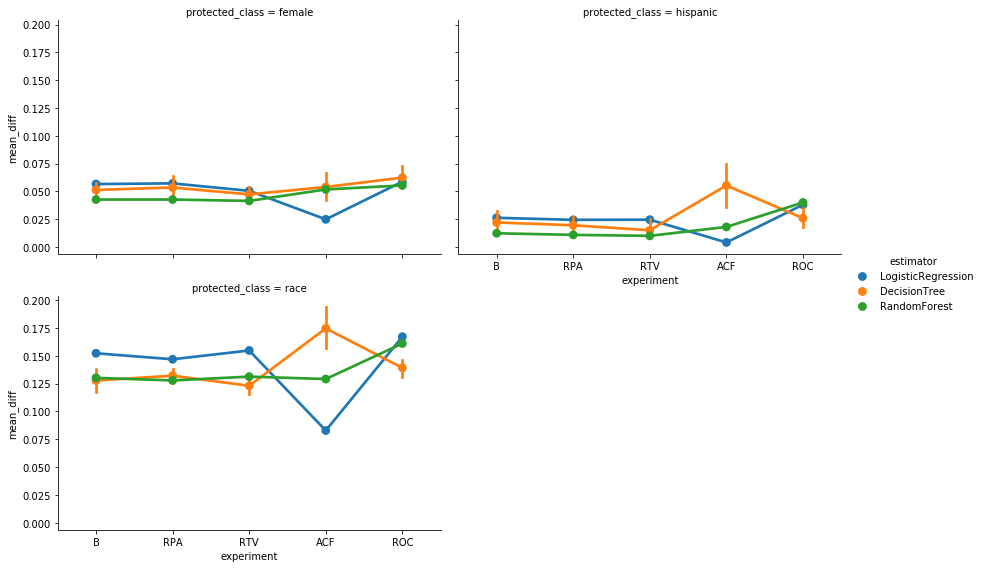

In [100]:
sns.catplot(data=result, y='mean_diff', x='experiment', kind ='point', height=4, aspect=1.5, col_wrap=2, \
            hue='estimator', col = 'protected_class').savefig("result.png", dpi=500)

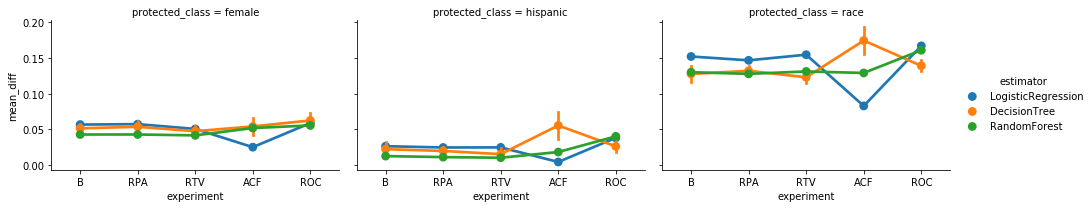

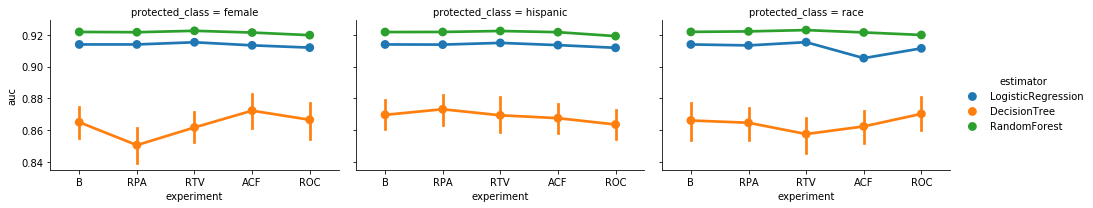

In [117]:
sns.catplot(data=result, y='mean_diff', x='experiment', kind ='point', height=3, aspect=1.5, \
            hue='estimator', col = 'protected_class')

sns.catplot(data=result, y='auc', x='experiment', kind ='point', height=3, aspect=1.5, \
            hue='estimator', col = 'protected_class')

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


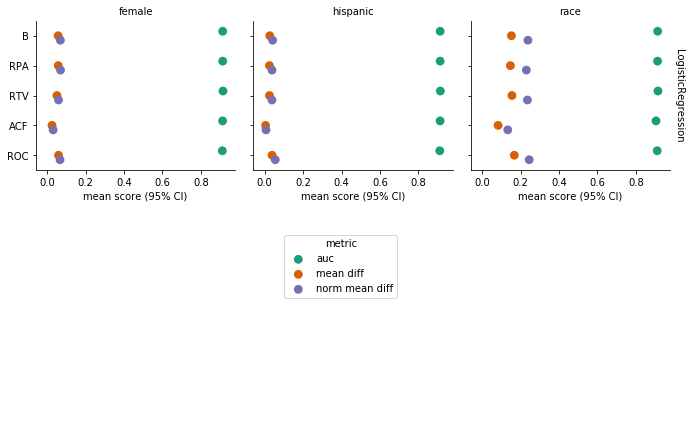

In [101]:
# VISUALIZE THE COMPARISON
comparison_palette = sns.color_palette("Dark2", n_colors=8)


def compare_experiment_results_multiple_model(experiment_results):
    g = (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["experiment", "protected_class", "estimator",
                                "fold_type"],
              var_name="metric", value_name="score")
        .assign(
            metric=lambda df: df.metric.str.replace("_", " "))
        .pipe((sns.factorplot, "data"), y="experiment",
              x="score", hue="metric",
              col="protected_class", row="estimator",
              join=False, size=3, aspect=1.1, dodge=0.3,
              palette=comparison_palette, margin_titles=True, legend=False))
    g.set_axis_labels("mean score (95% CI)")
    for ax in g.axes.ravel():
        ax.set_ylabel("")
        plt.setp(ax.texts, text="")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")
    plt.legend(title="metric", loc=9, bbox_to_anchor=(-0.65, -0.4))
    g.fig.legend(loc=9, bbox_to_anchor=(0.5, -0.3))
    # g.fig.tight_layout()
    g.savefig("fairness_aware_comparison.png", dpi=500)


compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'LogisticRegression'"))

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


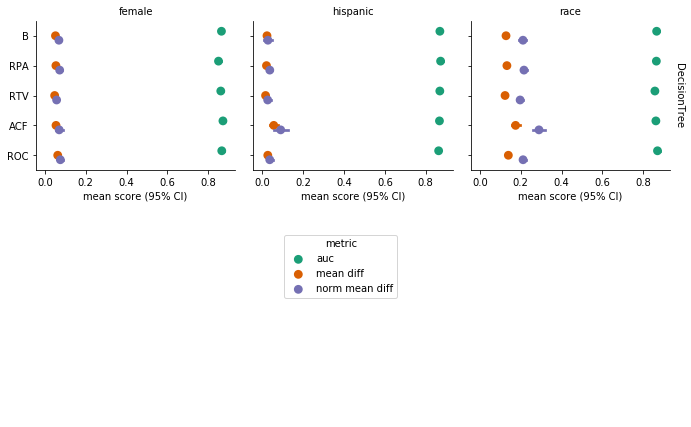

In [102]:
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'DecisionTree'"))

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


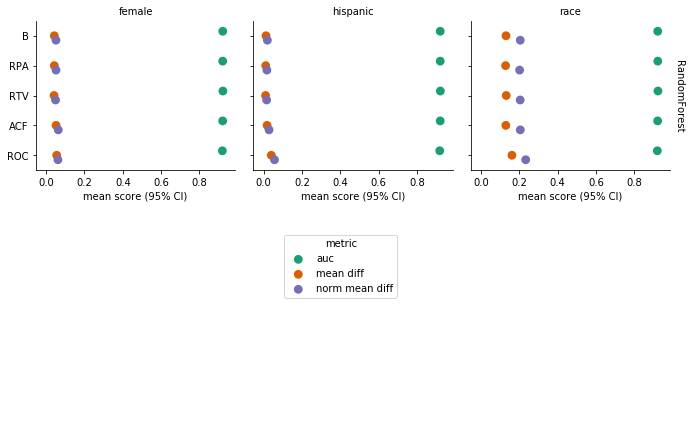

In [89]:
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'RandomForest'"))

# FAIRNESS-UTILITY TRADEOFF
- Fairness is presented by mean_difference. Smaller mean_difference, the better
- Utility is presented AUC. Bigger AUC, the better

In [103]:
from scipy import stats
# Get the correlation between mean_difference and AUC


def compute_corr_pearson(x, y, ci=0.95):
    corr = stats.pearsonr(x, y)
    z = np.arctanh(corr[0])
    sigma = (1 / ((len(x) - 3) ** 0.5))
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1 + ci) / 2)
    return corr, np.tanh(cint)


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


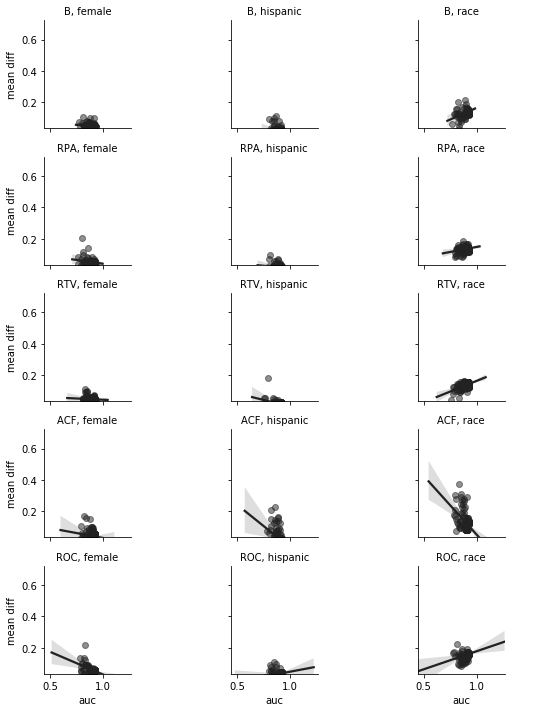

In [104]:
# VISUALIZE THE FAIRNESS-UTILITY FOR DIFFERENT FAIR-AWARENESS METHODS: average of all 3 ESTIMATORS
black_palette = sns.color_palette(["#222222"])


def plot_utility_fairness_tradeoff(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    sns_ax = sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha': 0.5},
                         **kwargs)
    (corr, p_val), ci = compute_corr_pearson(data[x], data[y])
    r_text = 'r = %0.02f (%0.02f, %0.02f)' % \
        (corr, ci[0], ci[1])
    sns_ax.annotate(
        r_text, xy=(0.7, 0),
        xytext=(0.07, 0.91),
        textcoords='axes fraction',
        fontweight="bold",
        fontsize=9,
        color="gray"
    )
    bottom_padding = 0.05
    top_padding = 0.5
    ylim = (data[y].min() - bottom_padding, data[y].max() + top_padding)
    sns_ax.set_ylim(*ylim)


g = sns.FacetGrid(
    (
        compare_experiments
        .drop("cv_fold", axis=1)
        .reset_index()
        .query("fold_type == 'test'")
        .rename(
            columns={"mean_diff": "mean diff"})
    ),
    col="protected_class",
    row="experiment",
    hue="experiment",
    size=2.0, aspect=1.3, sharey=True,
    palette=black_palette)
g.map_dataframe(plot_utility_fairness_tradeoff, "auc", "mean diff")
g.set_titles(template="{row_name}, {col_name}")
# g.fig.tight_layout()
g.savefig("fairness_utility_tradeoff.png", dpi=500);

# VISUALIZE THE FAIRNESS-UTILITY FOR DIFFERENT ESTIMATORS: average of 4 FAIR-AWARENESS METHODS
